In [24]:
import numpy as np
from scipy.stats import norm
from time import time

# Generate data from the sum of two Gaussians
np.random.seed(int(time()))

mu1_true, mu2_true = -2, 2
sigma_true = 1
n_samples = 100
X = np.concatenate([np.random.normal(mu1_true, sigma_true, size=n_samples),
                    np.random.normal(mu2_true, sigma_true, size=n_samples)])

# Initialize the means and mixing proportions randomly
mu1 = np.random.randn()
mu2 = np.random.randn()
w1 = np.random.rand()

# Define the Gaussian probability density function
def gaussian(x, mu, sigma):
    return norm(mu, sigma).pdf(x)

# E-step
def e_step(X, mu1, mu2, w1):
    w2 = 1 - w1
    likelihood1 = gaussian(X, mu1, sigma_true)
    likelihood2 = gaussian(X, mu2, sigma_true)
    weights1 = (w1 * likelihood1) / (w1 * likelihood1 + w2 * likelihood2)
    weights2 = 1 - weights1
    return weights1, weights2

# M-step
def m_step(X, weights1, weights2):
    mu1 = np.sum(weights1 * X) / np.sum(weights1)
    mu2 = np.sum(weights2 * X) / np.sum(weights2)
    w1 = np.mean(weights1)
    return mu1, mu2, w1

# Run the EM algorithm
n_iterations = 100
tolerance = 1e-6

for i in range(n_iterations):
    # E-step
    weights1, weights2 = e_step(X, mu1, mu2, w1)

    # M-step
    mu1_new, mu2_new, w1_new = m_step(X, weights1, weights2)

    # Check for convergence
    if np.abs(mu1_new - mu1) < tolerance and np.abs(mu2_new - mu2) < tolerance and np.abs(w1_new - w1) < tolerance:
        break

    # Update the means and mixing proportion
    mu1, mu2, w1 = mu1_new, mu2_new, w1_new

print(f"Estimated mu1: {mu1:.2f}")
print(f"Estimated mu2: {mu2:.2f}")
print(f"Estimated w1: {w1:.2f}")

Estimated mu1: -2.04
Estimated mu2: 1.91
Estimated w1: 0.51


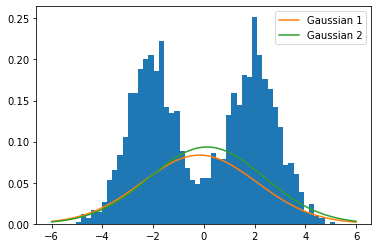

In [17]:
import numpy as np
from scipy.stats import norm

def em_gaussian_mixture(data, num_components, num_iterations):
    # Initialize parameters
    weights = np.ones(num_components) / num_components
    means = np.random.choice(data, num_components)
    var = np.var(data)
    
    for iteration in range(num_iterations):
        # Expectation step
        likelihoods = np.zeros((len(data), num_components))
        for i in range(num_components):
            likelihoods[:, i] = norm.pdf(data, means[i], np.sqrt(var))
        posteriors = likelihoods * weights
        posteriors /= np.sum(posteriors, axis=1, keepdims=True)
        
        # Maximization step
        weights = np.mean(posteriors, axis=0)
        means = np.sum(posteriors * data[:, np.newaxis], axis=0) / np.sum(posteriors, axis=0)
        
    return weights, means

import matplotlib.pyplot as plt

# Generate data from the sum of two Gaussians
np.random.seed(0)
data = np.concatenate([np.random.normal(-2, 1, 1000), np.random.normal(2, 1, 1000)])

# Run EM algorithm
weights, means = em_gaussian_mixture(data, 2, 100)

# Plot data and estimated Gaussians
plt.hist(data, bins=50, density=True)
x = np.linspace(-6, 6, 100)
y1 = weights[0] * norm.pdf(x, means[0], np.sqrt(np.var(data)))
y2 = weights[1] * norm.pdf(x, means[1], np.sqrt(np.var(data)))
plt.plot(x, y1, label='Gaussian 1')
plt.plot(x, y2, label='Gaussian 2')
plt.legend()
plt.show()

In [ ]:
git pull; git add .; git commit -m "update"; git push